In [1]:
from Dekel import Dekel
from NFW import NFW
import numpy as np
import matplotlib.pyplot as plt

# Define and plot Dekel+

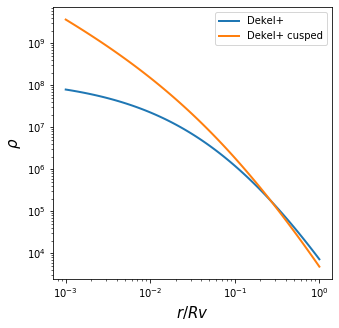

In [2]:
Rv = 200 #kpc
c = 10
Mv = 10**12 #Msun

#Cored Dekel+
a = 0.0 #Cored
rho,rs,a = Dekel.canonicalToModelParams(Mv,Rv,c,a)
myDekel = Dekel(trunc_r=Rv,rho=rho,rs=rs,a=a,name='Dekel+')

#Cusped Dekel+
a = 1.0 #Cusped
rho,rs,a = Dekel.canonicalToModelParams(Mv,Rv,c,a)
myDekel_cusped = Dekel(trunc_r=Rv,rho=rho,rs=rs,a=a,name='Dekel+ cusped')

fig,ax = myDekel.plot(r_min=0.001*Rv,linewidth=2)
myDekel_cusped.plot(r_min=0.001*Rv,ax=ax,linewidth=2)

# Compare NFW and Dekel+

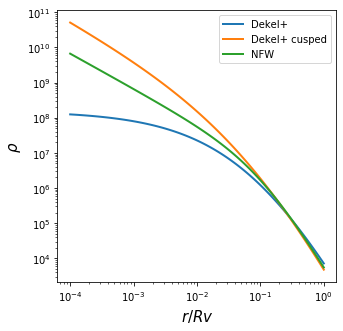

In [3]:
Rv = 200 #kpc
c = 10
Mv = 10**12 #Msun

#Cored Dekel+
a = 0.0 #Cored
rho,rs,a = Dekel.canonicalToModelParams(Mv,Rv,c,a)
myDekel = Dekel(trunc_r=Rv,rho=rho,rs=rs,a=a,name='Dekel+')

#Cusped Dekel+
a = 1.0 #Cusped
rho,rs,a = Dekel.canonicalToModelParams(Mv,Rv,c,a)
myDekel_cusped = Dekel(trunc_r=Rv,rho=rho,rs=rs,a=a,name='Dekel+ cusped')

#NFW
rho,rs = NFW.canonicalToModelParams(Mv,Rv,c)
myNFW = NFW(trunc_r=Rv,rho=rho,rs=rs,name='NFW')

fig,ax = myDekel.plot(r_min = 0.0001*Rv,linewidth=2)
myDekel_cusped.plot(r_min=0.0001*Rv,ax=ax,linewidth=2)
myNFW.plot(r_min=0.0001*Rv,ax=ax,linewidth=2)

# Fit mock noisy data to Dekel+

Dekel+ fit: rho = 69147094.87219256, rs = 26.376729471932055, a = 0.2390044565009497, 


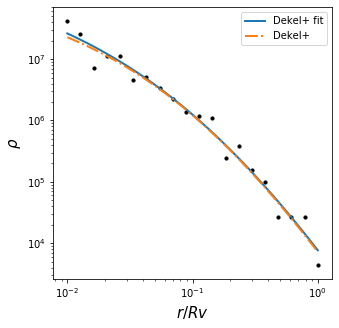

In [3]:
#Make mock noisy Dekel+ data with 0.2 dex noise
rlist = np.logspace(-2,0,20)*Rv
data = myDekel.density(rlist)
np.random.seed(10)
noise = np.random.normal(scale=0.2,size=data.size)
noisy_data = data*10**noise

#Fit data to Dekel+ profile
fitDekel,params,pcov = myDekel.fit_profile(rlist,np.log10(noisy_data),p0=(rho,Rv/c,a),logfit=True)

#Plot noisy data, original and fitted profiles
fig,ax = plt.subplots(1,1,figsize=(5,5))
fitDekel.plot(r_min=0.01*Rv,ax=ax,linewidth=2)
myDekel.plot(r_min=0.01*Rv,ax=ax,linewidth=2,linestyle='-.')
ax.scatter(rlist/Rv,data*10**noise,s=10,color='black')
ax.set_xscale('log')
ax.set_yscale('log')
print(fitDekel)